<a href="https://colab.research.google.com/github/salasemilio1/Salas-Projects/blob/main/Image_Compression_EmilioSalas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

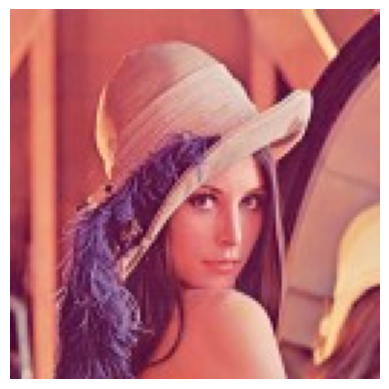

Image Size: 49152
Image Shape/Dimensions: (128, 128, 3)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio # import imread

from google.colab import files
import cv2

# Step 1: Upload the file
#uploaded = files.upload()  # Prompts a file upload dialog

# Step 2: Get the filename
#filename = list(uploaded.keys())[0]

# Step 3: Read the file using cv2.imread
# cv2.imread requires the exact path of the uploaded file
image = cv2.imread(filename, cv2.IMREAD_COLOR)  # Reads the image in color (BGR)

# Optional: Convert BGR to RGB for display using matplotlib
original_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 4: Display the image
plt.imshow(original_img)
plt.axis('off')
plt.show()

# Print image size and dimensions
print("Image Size:", original_img.size)
print("Image Shape/Dimensions:", original_img.shape)

In [ ]:
# prompt: create an m x n feature matrix,X, using original_img (jpeg image)

m = original_img.shape[0]  # Number of rows (height)
n = original_img.shape[1]  # Number of columns (width)
X = original_img.reshape(m * n, 3) # creates a m x n feature matrix
print("Feature matrix X shape:", X.shape)

Feature matrix X shape: (16384, 3)


**Note that 16384 is the data samples (m) and 3 is the number of features (3)**

In [ ]:
# Feature Normalization
X_normalized = X / 255.0

print("Normalized Feature matrix X shape:", X_normalized.shape)
print("Minimum value after normalization:", np.min(X_normalized))
print("Maximum value after normalization:", np.max(X_normalized))

Normalized Feature matrix X shape: (16384, 3)
Minimum value after normalization: 0.00392156862745098
Maximum value after normalization: 1.0


In [ ]:
K = 16 # We want to end up with 16 colors, so K should be 16.
max_iters = 8

# Initialize centroids randomly
centroids = X_normalized[np.random.choice(X_normalized.shape[0], K, replace=False)]

In [ ]:
# a function that takes the data samples and the cluster centroids and assigns each sample to
# a cluster centroid

def assign_clusters(X, centroids):
    """
    Assigns each data sample to the nearest cluster centroid.

    Args:
        X: An mx3 matrix of data samples.
        centroids: A Kx3 matrix of cluster centroids.

    Returns:
        An mxK matrix c, where c(i,k) = 1 if the i-th sample belongs to the k-th cluster, and 0 otherwise.
    """
    m = X.shape[0]
    K = centroids.shape[0]

    # Calculate the squared Euclidean distance between each sample and each centroid
    distances = np.sum((X[:, np.newaxis, :] - centroids[np.newaxis, :, :])**2, axis=2)

    # Find the index of the nearest centroid for each sample
    cluster_assignments = np.argmin(distances, axis=1)

    # Create the cluster assignment matrix c
    c = np.zeros((m, K))
    c[np.arange(m), cluster_assignments] = 1

    return c

In [ ]:
def update_centroids(c, X):
    """
    Updates the cluster centroids based on the cluster assignments.

    Args:
        c: An mxK cluster assignment matrix.
        X: An mxn data sample matrix.

    Returns:
        A Kxn matrix of updated cluster centroids.
    """
    K = c.shape[1]
    centroids = (c.T @ X) / np.sum(c, axis=0)[:, np.newaxis]
    return centroids

In [ ]:
previous_centroids = centroids.copy()
for i in range(max_iters):
    c = assign_clusters(X_normalized, centroids)
    centroids = update_centroids(c, X_normalized)

    # Check if centroids have changed
    if np.array_equal(centroids, previous_centroids):
        print(f"Centroids converged at iteration {i+1}. Exiting loop.")
        break

    previous_centroids = centroids.copy()

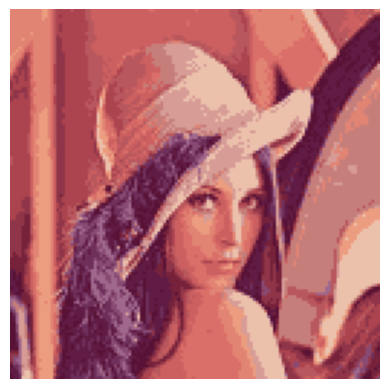

In [ ]:
# 9. Replace the value of each sample with their assigned cluster centroid.
# 10. Check if all values are between 0 and 1. If not, normalize the data by taking out the min and
# dividing by the max to ensure all values are between 0 and 1.
# 11. Reshape matrix X into the 128x128x3 array expected by the function imshow.
# 12. Use imshow to plot the compressed image!

# Get cluster assignments for all data points
c = assign_clusters(X_normalized, centroids)

# Replace each sample with its assigned cluster centroid
X_compressed = centroids[np.argmax(c, axis=1)] # Define X_compressed here

# Check if values are between 0 and 1
if np.min(X_compressed) < 0 or np.max(X_compressed) > 1:
    # Normalize the data
    X_compressed = (X_compressed - np.min(X_compressed)) / (np.max(X_compressed) - np.min(X_compressed))

# Reshape the compressed data back into an image
compressed_img = X_compressed.reshape(original_img.shape)

# Display the compressed image
plt.imshow(compressed_img)
plt.axis('off')
plt.show()